<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula2/MLP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com Multilayer Perceptron 

Olá! Nesse exercício você irá construir uma rede MLP com uma camada escondida .


## 1 - Pacotes ##

Pacotes necessários durante essa tarefa:
- [numpy](www.numpy.org) é um pacote científico fundamental para computação com Python.
- [sklearn](http://scikit-learn.org/stable/)  fornece ferramentas eficientes para mineração e análise de dados. 
- [matplotlib](http://matplotlib.org) é uma biblioteca para plotar gráficos em python.
- testCases fornecem alguns exemplos de teste para assegurar a corretude das suas funções.
- planar_utils provê várias funções úteis usadas nessa tarefa.

In [0]:
!git clone https://github.com/filiperobotic/cursoDL

In [0]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from cursoDL.codes.aula2.testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from cursoDL.codes.aula2.planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

Primeiro, vamos carregar o dataset que iremos trabalhar. O código seguinte irá carregar o dataset de duas classes "flower" em duas variáveis X e Y.

In [0]:
X, Y = load_planar_dataset()
#generate array to 1-dimensional to show the color in the graph
temp= Y.reshape(Y.shape[0]*Y.shape[1], 1)
colors = temp[:,0]



Visualize o dataset usando o matplotlib. A base irá se parecer com uma flor com pontos em rótulos vermelhos (y=0) e rótulos azuis (y=1). Seu objetivo é construir um modelo para se ajustar a essa base. 

In [0]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=colors, s=40, cmap=plt.cm.Spectral);

Você tem:
    - um array-numpy (matriz) X que contêm as caraterísticas  (x1, x2)
    - um array-numpy (vetor) Y que contêm os rótulos  (red:0, blue:1).


Vamos primeiro analisar como é o nosso dado.

**Exercício**: Quantos exemplos de treinamento nós temos? Qual é o tamanho das variáveis X e Y?

**Dica**: Use a função shape para pegar o tamanho de um array numpy.[(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [0]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = 
shape_Y = 
m =     # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

**Expected Output**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Regressão Logística

Antes de construirmos uma rede neural, vamos primeiro observar como é o desempenho do algoritmo de regressão logística para esse problema. Rode o código abaixo para treinar o classificador para a base.

In [0]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

Você pode agora plotar a superfície de decisão desse modelo. Rode o código abaixo.

In [0]:
# Plot the decision boundary for logistic regression
#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plot_decision_boundary(lambda x: clf.predict(x), X, colors)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretação**:  A base não é linearmente separável, então a regressão logística não desempenha bem. 

## 4 - Rede Neural

A regressão logística não foi bem para a base "flower". Iremos treinar uma rede neural com uma única camada escondida.

**Aqui está o seu modelo**:
<img src="https://github.com/Kulbear/deep-learning-coursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/images/classification_kiank.png?raw=1" style="width:600px;height:300px;">

**Matematicamente**:

Para cada exemplo $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Dado as predições de todos os exemplos, você também pode computar o custo  $J$, como mostrado a seguir: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$



### 4.1 - Defining the neural network structure ####

1.   List item
2.   List item



**Exercício**: Defina três variáveis:
    - n_x: tamanho da camada de entrada
    - n_h: o tamanho da camda escondida 
    - n_y: o tamanho da camda de saída

**Dica**: Use os tamanhos de X e Y para encontrar n_x e n_y. Use a função 'shape'. Para o tamanho da camada escondida defina de acordo com o modelo.

In [0]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x =    # size of input layer
    n_h = 
    n_y =  # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [0]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

**Expected Output** (these are not the sizes you will use for your network, they are just used to assess the function you've just coded).

<table style="width:20%">
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
    <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
    <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

### 4.2 - Inicialize os parâmetros do modelo Initialize the model's parameters ####

**Exercício**: Implemetne a função `initialize_parameters()`.

**Instruções**:
- Esteja certo que os tamanhos dos parâmetros estão corretos. 
- Você irá inicializar os pesos das matrizes com valores aleatórios. 
    - Use: `np.random.randn(a,b) * 0.01` para inicializar randomicamente uma matriz de tamanho  (a,b).
- Você irá inicializar o vetor bias com zeros. 
    - Use: `np.zeros((a,b))` para inicializar uma matriz de tamanho (a,b) com zeros.

In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = 
    b1 = 
    W2 = 
    b2 = 
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [0]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

**Expected Output**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



### 4.3 - The Loop ####

**Question**: Implemente `forward_propagation()`.

**Instructions**:
- Olhe acima a representação matemática do seu classificador.
- Você pode usar a função `sigmoid()`. Ela é uma função importada da biblioteca.
- Você também pode usar a função `np.tanh()` no lugar da sigmoide, se quiser.
- O passo que você deve implementar é:
   
    - Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (vetor de todas as predições de todos os exemplos do conjunto de treinamento).



In [0]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = 
    A1 = 
    Z2 = 
    A2 = 
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [0]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

**Expected Output**:
<table style="width:55%">
  <tr>
    <td> -0.000499755777742 -0.000496963353232 0.000438187450959 0.500109546852 </td> 
  </tr>
</table>

In [0]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Retrieve W1 and W2 from parameters

    W1 = parameters['W1']
    W2 = parameters['W2']
    
    
    # Compute the cross-entropy cost
   
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
   
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [0]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
        
    # Retrieve also A1 and A2 from dictionary "cache".
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Retrieve each gradient from the dictionary "grads"
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 4.4 - Integrando partes 4.1, 4.2 e 4.3 no nn_model() ####


In [0]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

### 4.5 Predicões



**Lembrete**: Predições = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    


In [0]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    
    return predictions

In [0]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, colors)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [0]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

A Acurácia é alta comparado com o modelo de Regressão logística. Vamos tentar com mais neurônios na camada escondida.

### 4.6 - Ajustando o tamanho da camada escondida ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

In [0]:


plt.figure(figsize=(16, 32))
hidden_layer_sizes = []
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, colors)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## 5) Desempenho em outras bases

Voce pode rodar novamente o código (menos a parte do dataset) para cada um desses datasets.

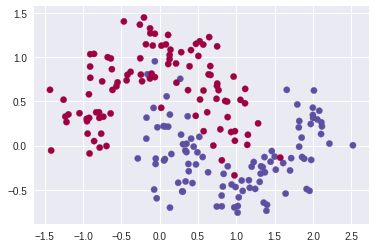

In [0]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
temp= Y.reshape(Y.shape[0]*Y.shape[1], 1)
colors = temp[:,0]

# make blobs binary
if dataset == "blobs":
    Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=colors, s=40, cmap=plt.cm.Spectral);